# Title : Bear vs Panda Recognition Image Dataset

## About Dataset

## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
train_dir = r"C:\Users\datta\OneDrive\Desktop\3RI Pawan sir\My Project\Pandas vs Bear\PandasBears\Train"
test_dir = r"C:\Users\datta\OneDrive\Desktop\3RI Pawan sir\My Project\Pandas vs Bear\PandasBears\Test"

## Image Data Generation

In [3]:
img_width, img_height = 256, 256

In [4]:
batch_size = 32

In [ ]:
Batch size is the number of traing samples used to compute the model parameters during training process.
Batch size can significantly impact the training efficiency and model performance.

# Image Augmentation

In [5]:
train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
test_dataset = ImageDataGenerator(rescale=1./255)

## Data Preprocessing

In [7]:
X_train = train_dataset.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 500 images belonging to 2 classes.


In [8]:
len(X_train)

16

In [9]:
X_test = test_dataset.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 100 images belonging to 2 classes.


## Sequential Model

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)),
    MaxPool2D((2,2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(2, activation="softmax")
])

## Compilation Of A Model

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Fit The Model

In [12]:
history = model.fit(X_train, epochs=10, validation_data=X_test)

Epoch 1/10


16/16 [==============================] - 81s 4s/step - loss: 1.3439 - accuracy: 0.6380 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 62s 4s/step - loss: 0.5786 - accuracy: 0.7100 - val_loss: 0.3363 - val_accuracy: 0.8700
Epoch 3/10
16/16 [==============================] - 62s 4s/step - loss: 0.5377 - accuracy: 0.7900 - val_loss: 0.4391 - val_accuracy: 0.9900
Epoch 4/10
16/16 [==============================] - 58s 4s/step - loss: 0.2844 - accuracy: 0.8920 - val_loss: 0.1121 - val_accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 57s 3s/step - loss: 0.1665 - accuracy: 0.9400 - val_loss: 0.1672 - val_accuracy: 0.9600
Epoch 6/10
16/16 [==============================] - 58s 4s/step - loss: 0.0530 - accuracy: 0.9820 - val_loss: 0.0536 - val_accuracy: 0.9900
Epoch 7/10
16/16 [==============================] - 57s 4s/step - loss: 0.0227 - accuracy: 0.9960 - val_loss: 0.0435 - val_accuracy: 0.9900
Epoch 8/10
16/16 [

## Visualization

In [13]:
import matplotlib.pyplot as plt

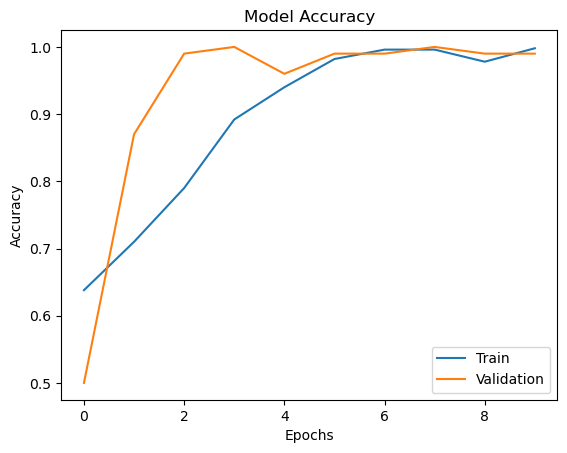

In [14]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

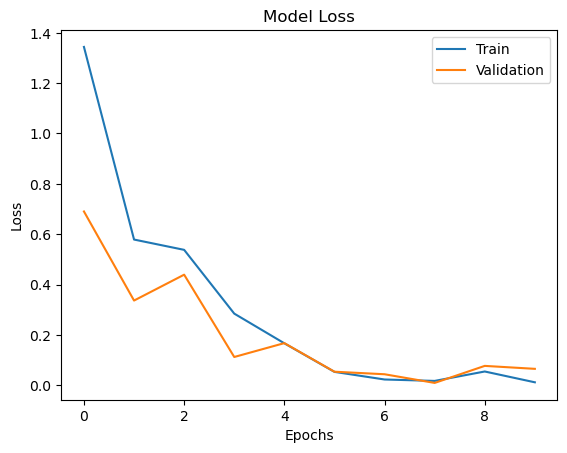

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

## Checking Index

In [16]:
class_labels = X_train.class_indices

In [17]:
class_names = {value: key for key, value in class_labels.items()}
print("Class Names:", class_names)

Class Names: {0: 'Bears', 1: 'Pandas'}


## Prediction 1

In [18]:
from tensorflow.keras.preprocessing import image

keras.preprocessing helps to handle the image augmentation.

In [22]:
img_path = r"C:\Users\datta\OneDrive\Pictures\252.jpeg"

In [23]:
img = image.load_img(img_path, target_size=(img_width, img_height))

In [24]:
img_arr = image.img_to_array(img)

In [25]:
img_arr = np.expand_dims(img_arr, axis=0)

In [26]:
img_arr = img_arr / 255.0

In [27]:
pred = model.predict(img_arr)

1/1 [==============================] - 0s 445ms/step


In [28]:
pred_class = np.argmax(pred)

In [29]:
class_names[pred_class]

'Bears'

# Prediction 2

In [ ]:
img_path = r"C:\Users\datta\OneDrive\Documents\panda_1.jpg"

In [ ]:
img = image.load_img(img_path, target_size=(img_width, img_height))

In [ ]:
img_arr = image.img_to_array(img)

In [ ]:
img_arr = np.expand_dims(img_arr, axis=0)

In [ ]:
img_arr = img_arr / 255.0

In [ ]:
pred = model.predict(img_arr)

In [ ]:
pred_class = np.argmax(pred)

In [ ]:
class_names[pred_class]

## Prediction 3

In [ ]:
img_path = r"C:\Users\datta\OneDrive\Documents\panda_2.jpg"

In [ ]:
img = image.load_img(img_path, target_size=(img_width, img_height))

In [ ]:
img_arr = image.img_to_array(img)

In [ ]:
img_arr = np.expand_dims(img_arr, axis=0)

In [ ]:
img_arr = img_arr / 255.0

In [ ]:
pred = model.predict(img_arr)

In [ ]:
pred_class = np.argmax(pred)

In [ ]:
class_names[pred_class]

## Prediction 4

In [ ]:
img_path = r"C:\Users\datta\OneDrive\Documents\bear2.jpeg"

In [ ]:
img = image.load_img(img_path, target_size=(img_width, img_height))

In [ ]:
img_arr = image.img_to_array(img)

In [ ]:
img_arr = np.expand_dims(img_arr, axis=0)

In [ ]:
img_arr = img_arr / 255.0

In [ ]:
pred = model.predict(img_arr)

In [ ]:
pred_class = np.argmax(pred)

In [ ]:
class_names[pred_class]

## Prediction 5

In [ ]:
img_path = r"C:\Users\datta\OneDrive\Documents\panda_3.jpeg"

In [ ]:
img = image.load_img(img_path, target_size=(img_width, img_height))

In [ ]:
img_arr = image.img_to_array(img)

In [ ]:
img_arr = np.expand_dims(img_arr, axis=0)

In [ ]:
img_arr = img_arr / 255.0

In [ ]:
pred = model.predict(img_arr)

In [ ]:
pred_class = np.argmax(pred)

In [ ]:
class_names[pred_class]